# **Saraton kasalligining xavfini aniqlash**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC

from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/iRavshan/Data-Science-and-AI/main/assets/datasets/classification/breast-cancer.csv')

# **Ma'lumotlarni tahlil qilish**

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# **Ma'lumotlarni tozalash**

* **NULL qiymatlarni tekshiramiz**

In [10]:
df.isnull().sum().sum()

0

* **Dublikat qiymatlarni tekshiramiz**

In [11]:
df.duplicated().sum()

0

* **Keraksiz ustunlar**

In [12]:
df.drop(['id'], axis=1, inplace=True)

# **Vizualizatsiya**

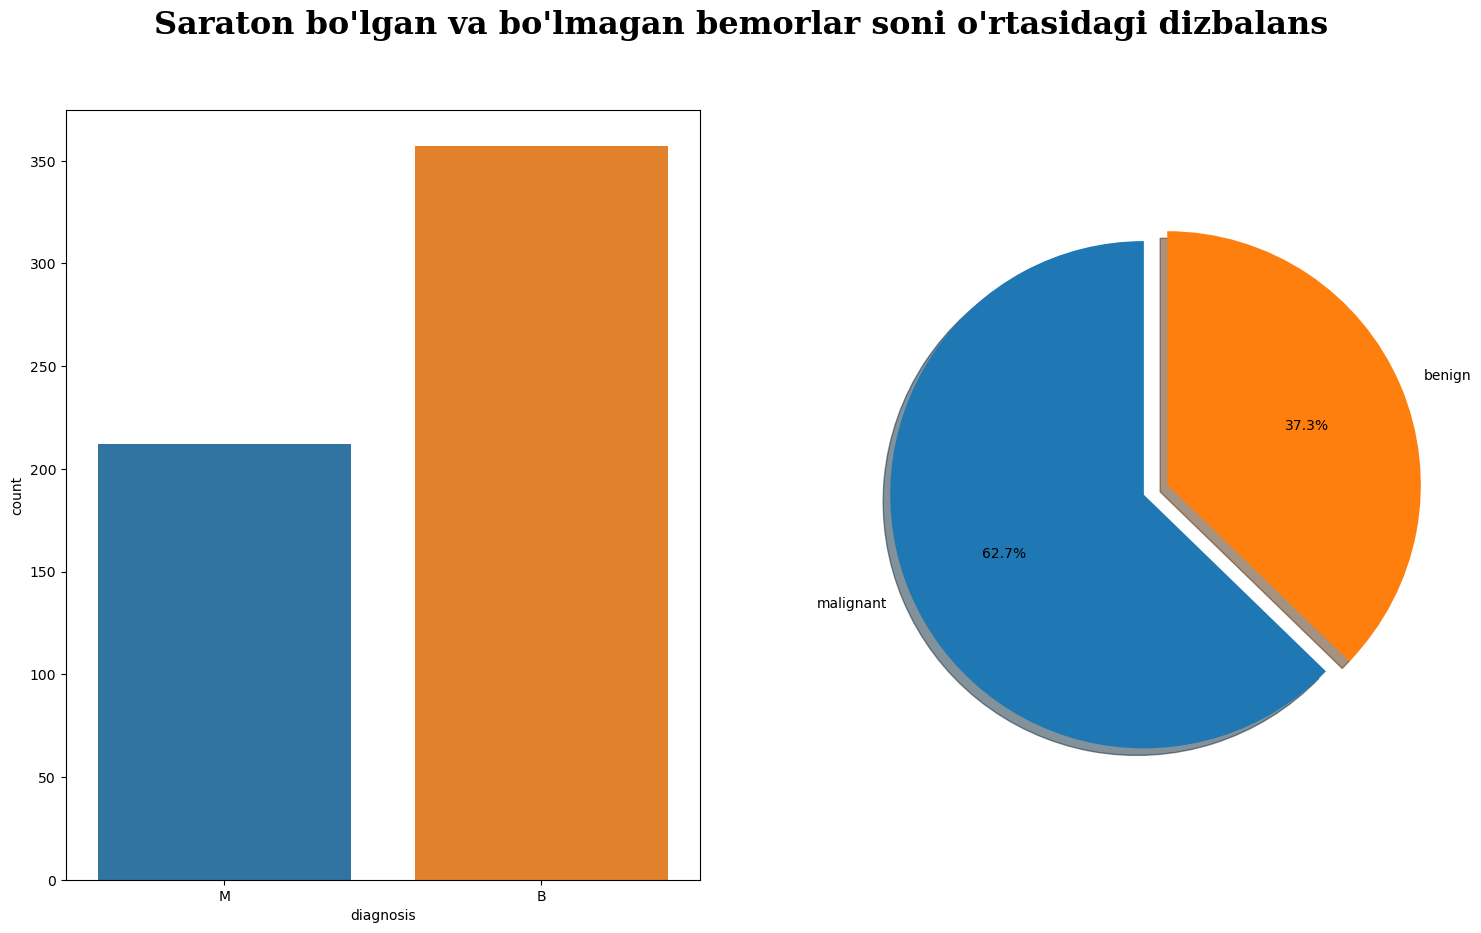

In [13]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.countplot(x=df['diagnosis'])

plt.subplot(1, 2, 2)
plt.pie(x=df['diagnosis'].value_counts(), 
        labels=['malignant', 'benign'],
        autopct='%1.1f%%',
        explode=[0, 0.1],
        startangle=90,
        shadow=True)

plt.suptitle("Saraton bo'lgan va bo'lmagan bemorlar soni o'rtasidagi dizbalans",
             fontproperties={
                 'size': 23,
                 'weight': 'semibold',
                 'family': 'Serif'
             })

plt.show()

# **Ma'lumotlarni tayyorlash**

* **Raqamli va categorical ustunlarni ajratish**

In [14]:
num_columns = df.columns.drop('diagnosis')
cat_columns = ['diagnosis']

* **Feature Scaling**

    Raqamli ustunlar uchun masshtablash (scaling) ni amalga oshiramiz

In [15]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[num_columns])

scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

* **Encoding**

  Categorical ustunlarni raqamli qiymatga o'tkazish lozim. Bizda bunday ustunlar atigi bitta va u ham target value bo'lgan `diagnosis` ustuni. Shu sabab encoding uchun `LabelEncoder` sinfidan foydalanimiz

In [16]:
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(df[cat_columns])

encoded_data = pd.DataFrame(encoded_data, columns=['diagnosis'])

* **Ma'lumotlarni qayta birlashtirish**

  Encoding jarayonidan o'tgan categorical qiymatlarni va scaling bosqichidan o'tgan numerical qiymatlarni birlashtiramiz

In [17]:
data = pd.concat([scaled_data, encoded_data], axis=1)

In [18]:
data.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
450,0.231388,0.400068,0.228319,0.122375,0.121874,0.266916,0.205647,0.118588,0.145960,0.340354,...,0.430704,0.164849,0.079139,0.154527,0.303296,0.257029,0.300687,0.145870,0.291749,0
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939,1
524,0.135643,0.201894,0.132748,0.063499,0.381782,0.198791,0.054592,0.120080,0.165152,0.399115,...,0.292377,0.119080,0.047016,0.467080,0.191140,0.067364,0.224330,0.184703,0.243015,0
480,0.245113,0.281366,0.238408,0.132259,0.345220,0.180970,0.068322,0.075895,0.204040,0.271272,...,0.422441,0.191344,0.089019,0.327742,0.194633,0.129393,0.195533,0.165780,0.145940,0
393,0.692366,0.425093,0.695253,0.535949,0.578406,0.580701,0.658388,0.776342,0.556566,0.339090,...,0.445629,0.605558,0.465936,0.521891,0.528189,0.563339,0.832302,0.446087,0.299488,1


* **Target value va feature larni aniqlash**

In [19]:
X = data[num_columns]
y = data[cat_columns]

* **Butun ma'lumotlarni train va test setlarga ajratish**

  Ma'lumotlarning `70%` qismini train uchun, qolgan `30%` qismini esa testlash uchun saqlab qo'yamiz 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Training**

In [21]:
model = SVC().fit(X_train, y_train)

# **Testlash**

In [22]:
y_pred = model.predict(X_test)

# **Modelni baholash**

* **Confusion Matrix**

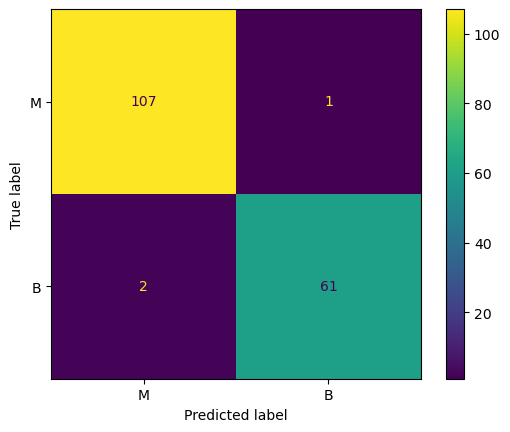

In [23]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=['M', 'B']).plot()

plt.show()

* **Jaccard Index**

In [24]:
print('Jaccard Index: ', jaccard_score(y_test, y_pred))

Jaccard Index:  0.953125


* **Qolgan yana boshqa o'lchashlar**

In [25]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.9824561403508771
Recall:  0.9682539682539683
Precision:  0.9838709677419355
F1 score:  0.976


# **Hyperparameter Tuning**

In [26]:
svc_params = [{
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': np.arange(3, 30),
    'decision_function_shape': ['ovo', 'ovr']
}]

trainer = GridSearchCV(estimator=SVC(),
                       param_grid=svc_params,
                       cv = 10,
                       scoring='accuracy')

# **Tuningdan keyingi training**

In [27]:
svc_model = trainer.fit(X_train, y_train)

* **Support Vector Classifier yordamida erishilgan eng yuqori aniqlik**

In [28]:
svc_model.best_score_

0.9723717948717947

* **Eng yuqori aniqlikni taqdim etuvchi parametrlar**

In [29]:
svc_model.best_params_

{'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf'}

# **Modelni saqlash**

In [30]:
import joblib

joblib.dump(svc_model, 'cancer_classification.joblib')

['cancer_classification.joblib']